In [2]:
#!pip install titiler

In [17]:
import sys
sys.path.append("..")
import helpers
import xarray as xr
import os
from titiler.xarray.io import Reader
import matplotlib.pyplot as plt

In [11]:
credentials = helpers.get_credentials()

In [13]:
os.environ['AWS_ACCESS_KEY_ID'] = credentials['AccessKeyId']
os.environ['AWS_SECRET_ACCESS_KEY'] = credentials['SecretAccessKey']
os.environ['AWS_SESSION_TOKEN'] = credentials['SessionToken']

4


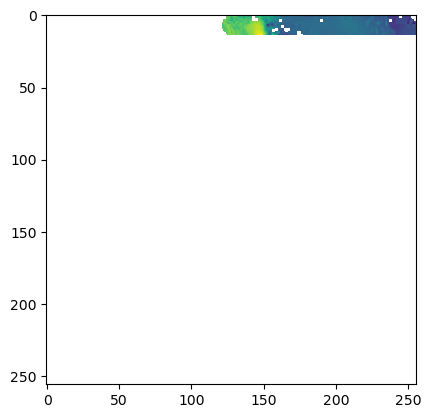

In [26]:
s3_file = 's3://nasa-eodc-scratch/NLDAS/netcdf/test_files/time24_lat350_lon700_Tair.nc'
ds = xr.open_dataset(s3fsfs.open(s3_file))
with Reader(src_path=s3_file, variable='Tair') as src:
    # info = src.info()
    # print(info.model_dump_json(indent=4))
    tile = src.tms.tile(src.bounds[0], src.bounds[1], src.minzoom)
    img = src.tile(*tile, indexes=1)

plt.imshow(img.data_as_image())